<a href="https://colab.research.google.com/github/tom919654/handson/blob/gh-pages/ch_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#normal equation

import numpy as np

X= 2 * np.random.rand(100,1)
y= 4+ 3*X + np.random.randn(100,1)

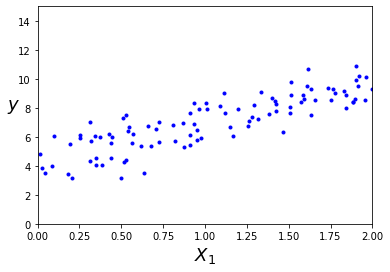

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.xlabel('$X_1$', fontsize = 18)
plt.ylabel('$y$', rotation=0, fontsize = 18)
plt.axis([0,2,0,15])
plt.savefig('generated_data_plot')
plt.show()

In [ ]:
X_b = np.c_[np.ones((100,1)), X]
# (2,100) (100,2) --> (2,2)
# (2,2) (2,100) --> (2,100)
# (2,100) (100,1) --> (2,1)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
X_b

array([[1.        , 1.82829108],
       [1.        , 1.90459202],
       [1.        , 0.43876669],
       [1.        , 1.9203424 ],
       [1.        , 0.52798933],
       [1.        , 1.90446871],
       [1.        , 1.25481108],
       [1.        , 0.25552909],
       [1.        , 0.50808311],
       [1.        , 0.67839445],
       [1.        , 1.42552563],
       [1.        , 0.61894289],
       [1.        , 0.72617867],
       [1.        , 0.70999626],
       [1.        , 0.56718745],
       [1.        , 0.91278447],
       [1.        , 1.77456237],
       [1.        , 1.76714467],
       [1.        , 1.63500182],
       [1.        , 0.95115718],
       [1.        , 0.20374369],
       [1.        , 0.80857386],
       [1.        , 1.61006794],
       [1.        , 1.96355913],
       [1.        , 0.34878756],
       [1.        , 0.42828996],
       [1.        , 1.61448104],
       [1.        , 1.08666638],
       [1.        , 1.11514901],
       [1.        , 0.44345738],
       [1.

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.2505362 ],
       [9.65842284]])

In [ ]:
X_new_b

array([[1., 0.],
       [1., 2.]])

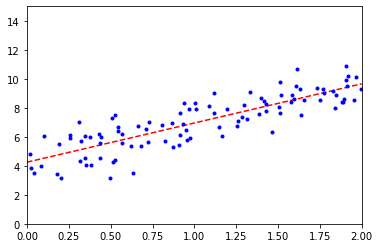

In [ ]:
plt.plot(X_new, y_predict, 'r--')
plt.plot(X,y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.2505362]), array([[2.70394332]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.2505362 ],
       [9.65842284]])

In [ ]:
# (yhat - y) **2, 2, svd --> 특잇값*rcond > 특잇값은 모두 0
theta_best_svd, residuals, rank, s= np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.2505362 ],
       [2.70394332]])

$$X^+y$$X+는 X의 유사역행렬(pseudoinverse)  
linalg.pinv()로 유사역행렬 계산한다  


In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.2505362 ],
       [2.70394332]])

경사 하강법 - 배치경사 하강법을 이용한 LinReg

In [ ]:
eta = 0.1 #학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 랜덤 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # dot is inner product
  theta = theta - eta * gradients

In [ ]:
theta

array([[4.2505362 ],
       [2.70394332]])

In [ ]:
X_b.dot(theta)

array([[9.19413166],
       [9.40044506],
       [5.43693646],
       [9.44303321],
       [5.67818942],
       [9.40011165],
       [7.64347424],
       [4.94147239],
       [5.62436412],
       [6.08487634],
       [8.10507671],
       [5.9241227 ],
       [6.21408217],
       [6.17032584],
       [5.78417892],
       [6.71865366],
       [9.04885227],
       [9.02879522],
       [8.67148844],
       [6.82241131],
       [4.80144758],
       [6.43687408],
       [8.60406865],
       [9.55988878],
       [5.193638  ],
       [5.40860797],
       [8.61600141],
       [7.18882051],
       [7.26583592],
       [5.44961981],
       [8.10554747],
       [9.23956736],
       [9.64815119],
       [6.78288114],
       [6.83022522],
       [7.66506362],
       [4.73981041],
       [4.29399192],
       [7.35988101],
       [5.72167977],
       [7.75177477],
       [4.37031501],
       [6.20671579],
       [6.71856079],
       [4.94129396],
       [6.88340268],
       [5.1830865 ],
       [8.530

In [ ]:
X_new_b.dot(theta)

array([[4.2505362 ],
       [9.65842284]])

In [ ]:
theta_path_bgd = []

def plot_gradient_descend(theta, eta, theta_path = None):
  m = len(X_b)
  plt.plot(X, y, 'b.')
  n_iterations = 1000
  for iteration in range(n_iterations):
    if iteration < 10:
      y_predict = X_new_b.dot(theta)
      style = 'b-' if iteration >0 else 'r--'
      plt.plot(X_new, y_predict, style)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if theta_path is not None:
      theta_path.append(theta)
  plt.xlabel('$x_1$', fontsize = 18)
  plt.axis([0,2,0,15])
  plt.title(r'$\eta = {}$'.format(eta), fontsize = 16)

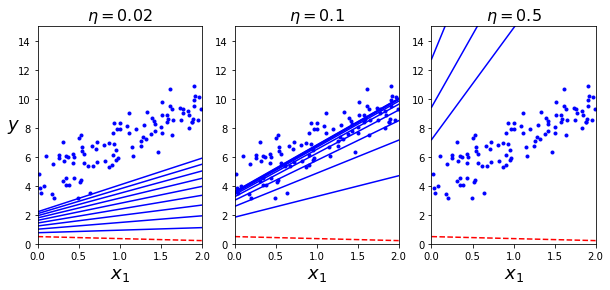

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize = (10,4))
plt.subplot(131); plot_gradient_descend(theta, eta = 0.02)
plt.ylabel('$y$', rotation=0, fontsize = 18)
plt.subplot(132); plot_gradient_descend(theta, eta=0.1, theta_path = theta_path_bgd)
plt.subplot(133); plot_gradient_descend(theta, eta =0.5)

plt.savefig('gradient_descend_plot')
plt.show()

확률적 경사 하강법

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
m

100

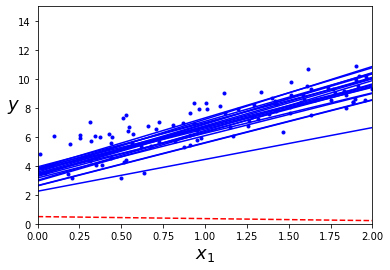

In [ ]:
n_epochs = 50 #50번 반복
t0, t1 = 5, 50

def learning_schedule(t): 
  return t0 / (t+t1)

# 0.1
#49*100 + 99

theta = np.random.randn(2,1) #랜덤 초기화

for epoch in range(n_epochs):
  for i in range(m):
    if epoch == 0 and i < 20:
      y_predict = X_new_b.dot(theta)
      style = 'b-' if i>0 else 'r--'
      plt.plot(X_new, y_predict, style)
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi= y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m +i)
    theta = theta - eta *gradients
    theta_path_sgd.append(theta)

plt.plot(X,y,'b.')
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.axis([0,2,0,15])
plt.savefig('sgd_plot')
plt.show()

In [ ]:
theta

array([[4.27927722],
       [2.68062656]])

In [ ]:
from sklearn.linear_model import SGDRegressor
# tol = tolerance // learning_rate = 'invscaling' eta0/t**0.25 (t는 반복횟수). 'constant', 'optimal', 'adaptive' 
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0= 0.1, random_state = 42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19980631]), array([2.68031797]))

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000
def learning_schedule(t):
  return t0/(t+t1)

t=0
for epoch in range(n_iterations):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for i in range(0, m, minibatch_size):
    t +=1
    xi = X_b_shuffled[i:i+minibatch_size]
    yi = y_shuffled[i:i+minibatch_size]
    gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(t)
    theta = theta - eta * gradients
    theta_path_mgd.append(theta)

In [ ]:
theta

array([[4.22937037],
       [2.67924702]])

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

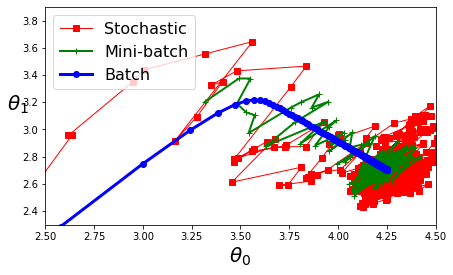

In [ ]:
plt.figure(figsize = (7,4))
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], 'r-s', linewidth=1, label = 'Stochastic')
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:,1], 'g-+', linewidth=2, label = 'Mini-batch')
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1], 'b-o', linewidth=3, label = 'Batch')
plt.legend(loc = 'upper left', fontsize = 16)
plt.xlabel(r'$\theta_0$', fontsize = 20, rotation =0)
plt.ylabel(r'$\theta_1$', fontsize = 20, rotation=0)
plt.axis([2.5,4.5,2.3,3.9])
plt.savefig('gradient_descent_paths_plot')
plt.show()

다항 회귀

In [ ]:
import numpy as np
import numpy.random as random_index
np.random.seed(42)

In [ ]:
m=100
#-3-3 100x1
X= 6 * np.random.rand(m,1) -3
#1/2 x^2 + x + 2
y= 0.5 * X**2 + X + 2 +np.random.randn(m,1)

In [ ]:
X

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547],
       [-2.87649303],
       [ 2.81945911],
       [ 1.99465584],
       [-1.72596534],
       [-1.9090502 ],
       [-1.89957294],
       [-1.17454654],
       [ 0.14853859],
       [-0.40832989],
       [-1.25262516],
       [ 0.67111737],
       [-2.16303684],
       [-1.24713211],
       [-0.80182894],
       [-0.26358009],
       [ 1.71105577],
       [-1.80195731],
       [ 0.08540663],
       [ 0.55448741],
       [-2.72129752],
       [ 0.64526911],
       [-1.97685526],
       [-2.60969044],
       [ 2.69331322],
       [ 2.7937922 ],
       [ 1.85038409],
       [-1.17231738],
       [-2.41396732],
       [ 1.10539816],
       [-0.35908504],
       [-2.26777059],
       [-0.02893854],
       [-2.79366887],
       [ 2.45592241],
       [-1.44732011],
       [ 0

In [ ]:
y

array([[1.61761105],
       [8.06185944],
       [4.45250583],
       [0.77958493],
       [1.84625712],
       [2.42319555],
       [4.34161741],
       [6.09231611],
       [1.98223289],
       [3.52597398],
       [4.17601517],
       [9.12288507],
       [5.45422161],
       [2.27678027],
       [2.01026368],
       [2.87326073],
       [0.81318015],
       [1.8319083 ],
       [1.28292861],
       [0.06839479],
       [3.19243691],
       [2.43738261],
       [1.5356506 ],
       [1.28504875],
       [0.3557864 ],
       [4.75426637],
       [1.47885324],
       [1.28677651],
       [2.54692985],
       [3.38548344],
       [4.73964113],
       [2.15170091],
       [3.05310205],
       [8.24583537],
       [6.77765841],
       [5.53583085],
       [1.57507685],
       [4.9628939 ],
       [3.52398974],
       [2.00693334],
       [2.26890937],
       [0.80280214],
       [4.25144683],
       [8.22363289],
       [2.39107959],
       [2.54118912],
       [2.91120971],
       [0.725

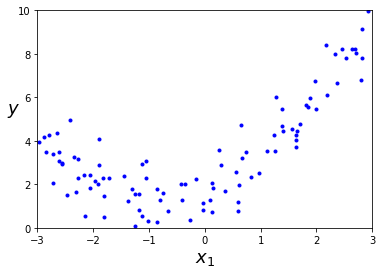

In [ ]:
plt.plot(X,y,'b.')
plt.xlabel('$x_1$',fontsize = 18)
plt.ylabel('$y$', fontsize=18, rotation = 0)
plt.axis((-3,3,0,10))
plt.savefig('quadratic_data_plot')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False) #가장 높은 차수=2
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [ ]:
LinearRegression?

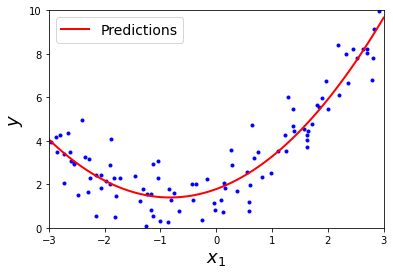

In [ ]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new, y_new, 'r',linewidth = 2, label = 'Predictions')
plt.xlabel('$x_1$',fontsize =18)
plt.ylabel('$y$',fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 14)
plt.axis([-3,3,0,10])
plt.savefig('quadratic_predictions_plot')
plt.show()

In [ ]:
X_new_poly.shape

(100, 2)

In [ ]:
y_new.shape

(100, 1)

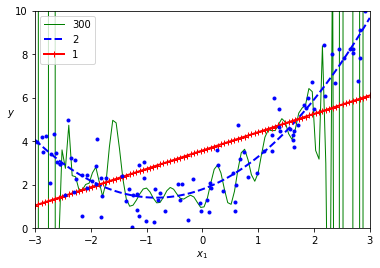

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (('g-', 1, 300), ('b--',2, 2), ('r-+', 2, 1)):
  polybig_features = PolynomialFeatures(degree = degree, include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  Polynomial_regressions = Pipeline([
                                     ('poly_features', polybig_features),
                                     ('std_scaler', std_scaler),
                                     ('lin_reg', lin_reg)
  ])

  Polynomial_regressions.fit(X,y)
  y_newbig = Polynomial_regressions.predict(X_new)
  plt.plot(X_new, y_newbig, style, label = str(degree), linewidth = width)

plt.plot(X,y,'b.', linewidth = 3)
plt.legend(loc='upper left')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([-3,3,0,10])
plt.savefig('high_degree_polynomials_plot')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state = 10)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train')
  plt.plot(np.sqrt(val_errors), 'b', linewidth = 3, label = 'val')
  plt.legend(loc = 'upper right', fontsize = 14)
  plt.xlabel('Training set size', fontsize = 14)
  plt.ylabel('RMSE', fontsize=14)

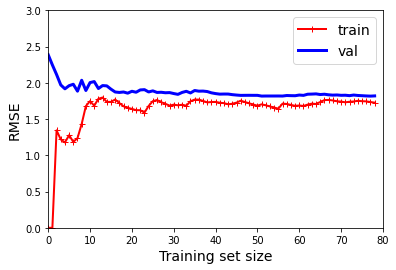

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0,80,0,3])
plt.savefig('underfitting_learning_curves_plot')
plt.show()

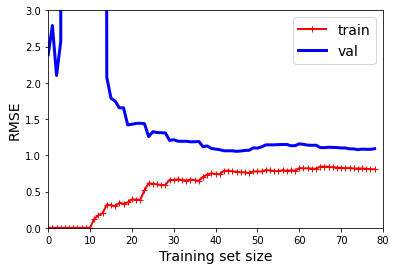

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                                  ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression,X,y)
plt.axis([0,80,0,3])
plt.savefig('learning_curves_plot')
plt.show()

규제가 있는 모델

In [ ]:
np.random.seed(42)
m=20
X=3*np.random.rand(m,1)
y=1 + 0.5 * X + np.random.randn(m,1) / 1.5

X_new = np.linspace(0,3,100).reshape(100,1)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky', random_state = 42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [ ]:
ridge_reg = Ridge(alpha = 1, solver='sag', random_state = 42, max_iter = 1000)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

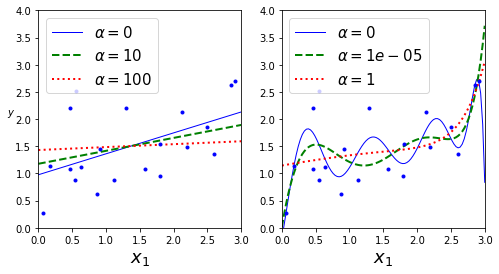

In [ ]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
  for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
    model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
    if polynomial:
      model = Pipeline([
                        ('poly_features', PolynomialFeatures(degree=10, include_bias = False)),
                        ('std_scaler', StandardScaler()),
                        ('regul_reg', model),
      ])
    model.fit(X,y)
    y_new_regul = model.predict(X_new)
    lw = 2 if alpha > 0 else 1
    plt.plot(X_new, y_new_regul, style, linewidth = lw, label = r"$\alpha = {}$".format(alpha))
  plt.plot(X,y,'b.', linewidth = 3)
  plt.legend(loc = 'upper left',fontsize = 15)
  plt.xlabel('$x_1$', fontsize = 18)
  plt.axis([0,3,0,4])

plt.figure(figsize = (8,4))
plt.subplot(121)
plot_model(Ridge, polynomial =False, alphas = (0, 10, 100), random_state = 42)
plt.ylabel('$y$', rotation = 0)
plt.subplot(122)
plot_model(Ridge, polynomial =True, alphas = (0, 10**-5, 1), random_state = 42)

plt.savefig('ridge_regression_plot')
plt.show()

In [ ]:
sgd_reg = SGDRegressor(random_state = 42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


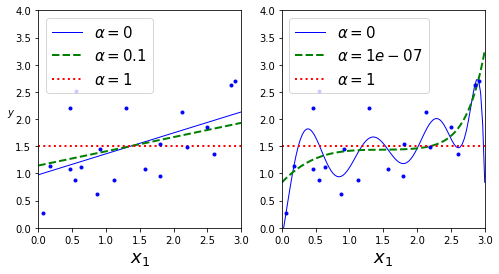

In [ ]:
from sklearn.linear_model import Lasso
plt.figure(figsize= (8,4))
plt.subplot(121)

plot_model(Lasso, polynomial = False, alphas = (0,0.1,1), random_state = 42)
plt.ylabel('$y$', rotation = 0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.savefig('lasso_regression_plot')
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [ ]:
np.random.seed(42)
m=100
X = 6 * np.random.rand(m,1) - 3
y = 2+ X + 0.5 + X**2 + np.random.randn(m,1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size = 0.5, random_state = 10)

In [ ]:
from sklearn.base import clone

poly_scaler = Pipeline([
                        ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
                        ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol = -np.infty, warm_start=True,
                       penalty=None, learning_rate='constant', eta0=0.0005, random_state=42)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)



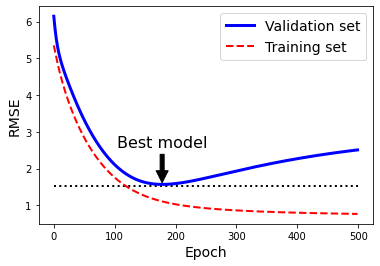

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.savefig("early_stopping_plot")
plt.show()

In [ ]:
best_epoch, best_model

(178,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

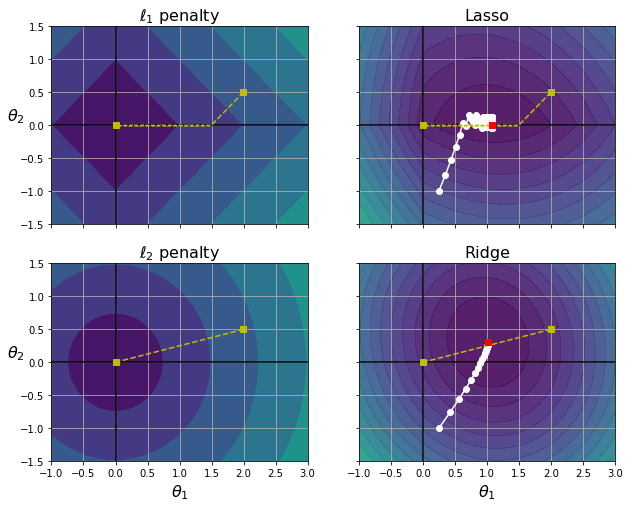

In [ ]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

plt.savefig("lasso_vs_ridge_plot")
plt.show()

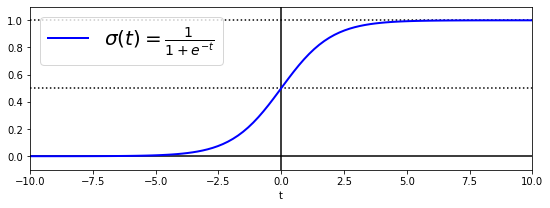

In [ ]:
#이름은 회귀지만 분류 모델임 이게 sigmoid function
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.savefig("logistic_function_plot")
plt.show()

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X = iris["data"][:, 3:]  # 꽃잎 너비
#              0  - Iris-Setosa
#              1  - Iris-Versicolour 
#              2  - Iris-Virginica
y = (iris["target"] == 2).astype(np.int)  # Iris virginica이면 1 아니면 0

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

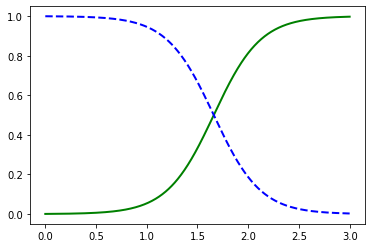

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

/usr/local/lib/python3.6/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


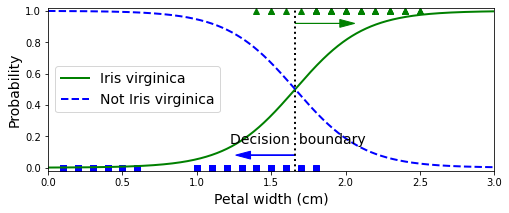

In [ ]:
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.savefig("logistic_regression_plot")
plt.show()

In [ ]:
decision_boundary

array([1.66066066])

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

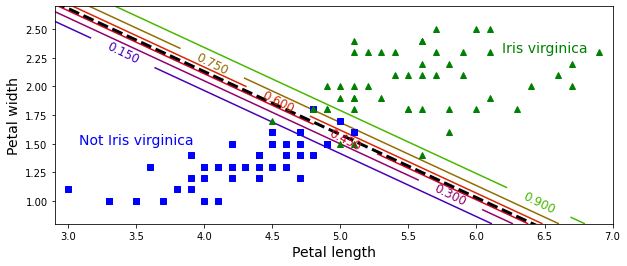

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
#결정 함수 값 = coef_[0][0] * 길이 + coef_[0][1] * 너비 + 절편(intercept)
# 0 = coef_[0][0] * 길이 + coef_[0][1] * 너비 + 절편(intercept)
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.savefig("logistic_regression_contour_plot")
plt.show()

In [ ]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

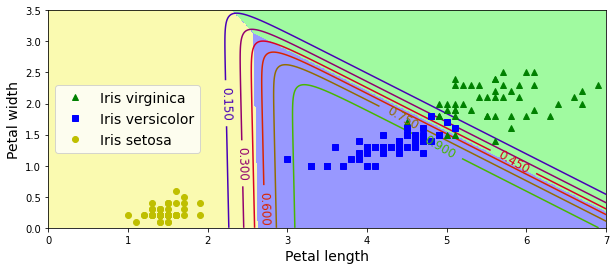

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.savefig("softmax_regression_contour_plot")
plt.show()

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])